In [12]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sequence_tools as st
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
from decimal import Decimal


# import parse_dms_tools as dms
import parse_msa_tools as msa
#import parse_dssp as dssp
import seaborn as sns; sns.set()
sns.set_style('white')

import pickle

my_path = '/Users/hridindu/Documents/C3-C7_paper/PU/C7/'

In [18]:
### Parameters for creating figures

template = 'none'
import seaborn as sns; sns.set()
sns.set_style('white')
pal = sns.color_palette()
pal.as_hex()
c3_color = pal[0]
c7_color = pal[1]
params = {'axes.labelsize': 7,
          'axes.titlesize':7, 
          'legend.fontsize': 7, 
          'xtick.labelsize': 7,
          'ytick.labelsize': 7,
          'axes.labelpad': 2}
matplotlib.rcParams.update(params)


In [3]:
#reference sequences with subsequent coding start, coding terminus, n-terminus offset. 
c3 = 'caspase3_ref.fasta'
(c3o, c3t, c3_off) = (149,926,28)

c7 = 'caspase7_ref.fasta'
(c7o, c7t, c7_off) = (148, 994, 23)

important_positions = [164, 122, 176]

In [4]:
caspase_re = pickle.load(open('caspase_re.pkl', 'rb'))

In [5]:

C7_1 = pd.read_csv('C7-1_parameters.csv')
C7_1['Position_c7'] = C7_1['group'] + c7_off
C7_1['WT_aa'] = C7_1['Unnamed: 0'].str.slice(start = 0, stop = 1)
C7_1['mut'] = C7_1['Unnamed: 0'].apply(lambda x: x[-1])
C7_1 = C7_1.rename(columns = {'Unnamed: 0' : 'mutation'})

C7_1 = C7_1.merge(
                    caspase_re[['Position_c7','Aligned Position', 'mean_RE_c7']], 
                    left_on = 'Position_c7',
                    right_on = 'Position_c7'
                    )
C7_1 = C7_1.drop(labels = ['sep','group'], axis = 1)

In [6]:

C7_2 = pd.read_csv('C7-2_parameters.csv')
C7_2['Position_c7'] = C7_2['group'] + c7_off
C7_2['WT_aa'] = C7_2['Unnamed: 0'].str.slice(start = 0, stop = 1)
C7_2['mut'] = C7_2['Unnamed: 0'].apply(lambda x: x[-1])
C7_2 = C7_2.rename(columns = {'Unnamed: 0' : 'mutation'})

C7_2 = C7_2.merge(
                    caspase_re[['Position_c7','Aligned Position', 'mean_RE_c7']], 
                    left_on = 'Position_c7',
                    right_on = 'Position_c7'
                    )
# C7_2 = C7_2.drop(labels = ['sep','group'], axis = 1)

In [7]:

C7_3 = pd.read_csv('C7-3_parameters.csv')
C7_3['Position_c7'] = C7_3['group'] + c7_off
C7_3['WT_aa'] = C7_3['Unnamed: 0'].str.slice(start = 0, stop = 1)
C7_3['mut'] = C7_3['Unnamed: 0'].apply(lambda x: x[-1])
C7_3 = C7_3.rename(columns = {'Unnamed: 0' : 'mutation'})

C7_3 = C7_3.merge(
                    caspase_re[['Position_c7','Aligned Position', 'mean_RE_c7']], 
                    left_on = 'Position_c7',
                    right_on = 'Position_c7'
                    )
# C7_3 = C7_3.drop(labels = ['sep','group'], axis = 1)

KeyError: 'mutation'

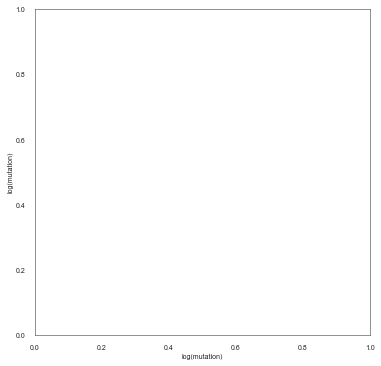

In [15]:
for i, metric1 in enumerate(list(C7_1)[:-1]):
    for j, metric2 in enumerate(list(C7_2)[:-1]):
        if (metric1 == metric2) and (metric1 or metric2) != 'Aligned Position':
            fig5 = plt.figure(figsize=(6,6))
            ax = plt.gca()
            # ax.set_aspect('equal', 'box')
            # ax.plot([0,.008*100],[0,.008*100],c = 'grey', alpha = 1, linewidth = .25)
            ax.spines['top'].set_linewidth(0.5)
            ax.spines['right'].set_linewidth(0.5)
            ax.spines['bottom'].set_linewidth(0.5)
            ax.spines['left'].set_linewidth(0.5)
            plt.xlabel('log(%s)' % metric1)
            plt.ylabel('log(%s)' % metric2)

            sns.scatterplot(x = np.log(C7_1.groupby('Aligned Position').mean()['%s' % metric1]),
                            y = np.log(C7_2.groupby('Aligned Position').mean()['%s' % metric2]),
                            markers = 'o',
                            linewidth = .1,
#                             facecolor = ['none' if c == 'b' else 'black' for c in c_mean['shared_res_color']], 
                            alpha=.75, 
                            edgecolors='black',
                            s = 15
                           )
            plt.xlabel('log(%s) Rep. 1' % metric1)
            plt.ylabel('log(%s) Rep. 2' % metric2)
            
            plt.show()
            plt.close()

In [ ]:
for i, metric1 in enumerate(list(C7_1)[:-1]):
    for j, metric2 in enumerate(list(C7_3)[:-1]):
        if (metric1 == metric2) and (metric1 or metric2) != 'Aligned Position':
            fig5 = plt.figure(figsize=(6,6))
            ax = plt.gca()
            # ax.set_aspect('equal', 'box')
            # ax.plot([0,.008*100],[0,.008*100],c = 'grey', alpha = 1, linewidth = .25)
            ax.spines['top'].set_linewidth(0.5)
            ax.spines['right'].set_linewidth(0.5)
            ax.spines['bottom'].set_linewidth(0.5)
            ax.spines['left'].set_linewidth(0.5)
            plt.xlabel('log(%s)' % metric1)
            plt.ylabel('log(%s)' % metric2)

            sns.scatterplot(x = np.log(C7_1.groupby('Aligned Position').mean()['%s' % metric1]),
                            y = np.log(C7_3.groupby('Aligned Position').mean()['%s' % metric2]),
                            markers = 'o',
                            linewidth = .1,
#                             facecolor = ['none' if c == 'b' else 'black' for c in c_mean['shared_res_color']], 
                            alpha=.75, 
                            edgecolors='black',
                            s = 15
                           )
            plt.xlabel('log(%s) Rep. 1' % metric1)
            plt.ylabel('log(%s) Rep. 3' % metric2)
            
            plt.show()
            plt.close()

In [ ]:
for i, metric1 in enumerate(list(C7_2)[:-1]):
    for j, metric2 in enumerate(list(C7_3)[:-1]):
        if (metric1 == metric2) and (metric1 or metric2) != 'Aligned Position':
            fig5 = plt.figure(figsize=(6,6))
            ax = plt.gca()
            # ax.set_aspect('equal', 'box')
            # ax.plot([0,.008*100],[0,.008*100],c = 'grey', alpha = 1, linewidth = .25)
            ax.spines['top'].set_linewidth(0.5)
            ax.spines['right'].set_linewidth(0.5)
            ax.spines['bottom'].set_linewidth(0.5)
            ax.spines['left'].set_linewidth(0.5)
            plt.xlabel('log(%s)' % metric1)
            plt.ylabel('log(%s)' % metric2)

            sns.scatterplot(x = np.log(C7_2.groupby('Aligned Position').mean()['%s' % metric1]),
                            y = np.log(C7_3.groupby('Aligned Position').mean()['%s' % metric2]),
                            markers = 'o',
                            linewidth = .1,
#                             facecolor = ['none' if c == 'b' else 'black' for c in c_mean['shared_res_color']], 
                            alpha=.75, 
                            edgecolors='black',
                            s = 15
                           )
            plt.xlabel('log(%s) Rep. 2' % metric1)
            plt.ylabel('log(%s) Rep. 3' % metric2)
            
            plt.show()
            plt.close()

In [ ]:
C7_1


In [ ]:
reps = [C7_1, C7_2, C7_3]
for i,repx in enumerate(reps,1):
    for j, repy in enumerate(reps,1): 
        if i != j:
            fig5 = plt.figure(figsize=(6,6))
            ax = plt.gca()
            # ax.set_aspect('equal', 'box')
            # ax.plot([0,.008*100],[0,.008*100],c = 'grey', alpha = 1, linewidth = .25)
            ax.spines['top'].set_linewidth(0.5)
            ax.spines['right'].set_linewidth(0.5)
            ax.spines['bottom'].set_linewidth(0.5)
            ax.spines['left'].set_linewidth(0.5)
            plt.xlabel('log(%s)' % 'p_group_adj')
            plt.ylabel('log(%s)' % 'p_group_adj')
            
            sns.scatterplot(x = np.log(repx['p.grp.adj']),
                            y = np.log(repy['p.grp.adj']),
                            markers = 'o',
                            linewidth = .1,
#                             facecolor = ['none' if c == 'b' else 'black' for c in c_mean['shared_res_color']], 
                            alpha=.75, 
                            edgecolors='black',
                            s = 15
                           )
            plt.xlabel('log(p_grp_adj) Rep. %i' % i)
            plt.ylabel('log(p_grp_adj) Rep. %i' % j)
            
            plt.show()
            plt.close()


In [ ]:
for i,repx in enumerate(reps,1):
    for j, repy in enumerate(reps,1): 
        if i != j:
            fig5 = plt.figure(figsize=(6,6))
            ax = plt.gca()
            # ax.set_aspect('equal', 'box')
            # ax.plot([0,.008*100],[0,.008*100],c = 'grey', alpha = 1, linewidth = .25)
            ax.spines['top'].set_linewidth(0.5)
            ax.spines['right'].set_linewidth(0.5)
            ax.spines['bottom'].set_linewidth(0.5)
            ax.spines['left'].set_linewidth(0.5)

            
            sns.scatterplot(x = np.log(repx['p.adj']),
                            y = np.log(repy['p.adj']),
                            markers = 'o',
                            linewidth = .1,
#                             facecolor = ['none' if c == 'b' else 'black' for c in c_mean['shared_res_color']], 
                            alpha=.75, 
                            edgecolors='black',
                            s = 15
                           )
            plt.xlabel('log(p_adj) Rep. %i' % i)
            plt.ylabel('log(p_adj) Rep. %i' % j)
            
            plt.show()
            plt.close()


In [ ]:
for i,repx in enumerate(reps,1):
    for j, repy in enumerate(reps,1): 
        if i != j:
            fig5 = plt.figure(figsize=(6,6))
            ax = plt.gca()
            # ax.set_aspect('equal', 'box')
            # ax.plot([0,.008*100],[0,.008*100],c = 'grey', alpha = 1, linewidth = .25)
            ax.spines['top'].set_linewidth(0.5)
            ax.spines['right'].set_linewidth(0.5)
            ax.spines['bottom'].set_linewidth(0.5)
            ax.spines['left'].set_linewidth(0.5)

            
            sns.scatterplot(x = np.log(repx.groupby('Aligned Position').mean().abs()['coef']),
                            y = np.log(repy.groupby('Aligned Position').mean().abs()['coef']),
                            markers = 'o',
                            linewidth = .1,
#                             facecolor = ['none' if c == 'b' else 'black' for c in c_mean['shared_res_color']], 
                            alpha=.75, 
                            edgecolors='black',
                            s = 15
                           )
            plt.xlabel('log(mean(abs(coef))) Rep. %i' % i)
            plt.ylabel('log(mean(abs(coef))) Rep. %i' % j)
            
            plt.show()
            plt.close()

            

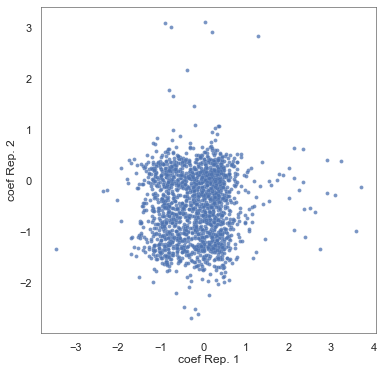

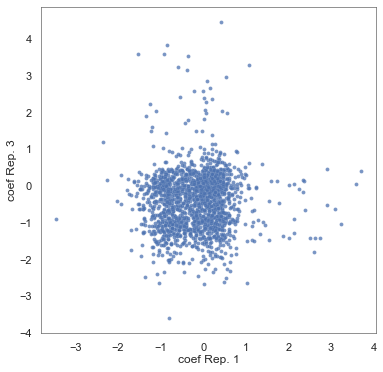

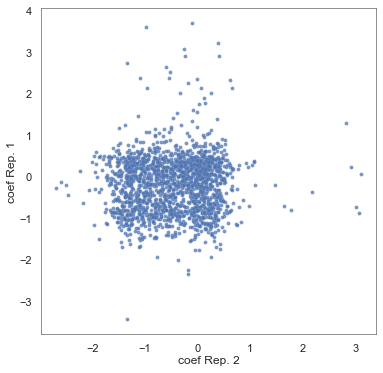

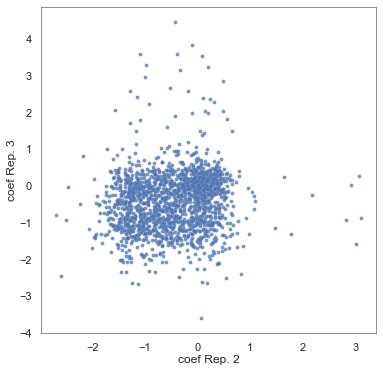

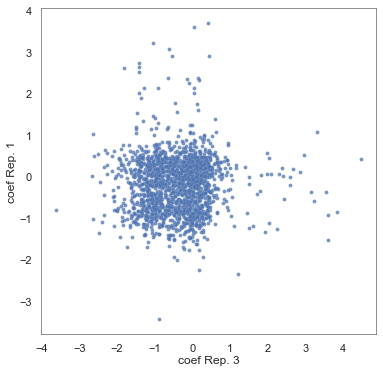

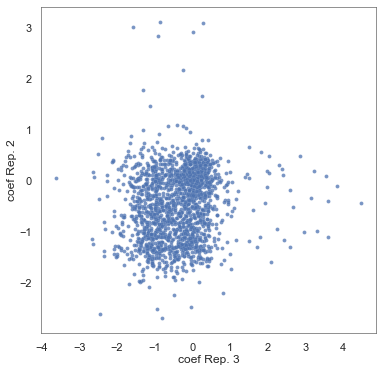

In [15]:
reps = [C7_1, C7_2, C7_3]

for i,repx in enumerate(reps,1):
    for j, repy in enumerate(reps,1): 
        if i != j:
            fig5 = plt.figure(figsize=(6,6))
            ax = plt.gca()
            # ax.set_aspect('equal', 'box')
            # ax.plot([0,.008*100],[0,.008*100],c = 'grey', alpha = 1, linewidth = .25)
            ax.spines['top'].set_linewidth(0.5)
            ax.spines['right'].set_linewidth(0.5)
            ax.spines['bottom'].set_linewidth(0.5)
            ax.spines['left'].set_linewidth(0.5)

            
            sns.scatterplot(x = (repx['coef']),
                            y = (repy['coef']),
                            markers = 'o',
                            linewidth = .1,
#                             facecolor = ['none' if c == 'b' else 'black' for c in c_mean['shared_res_color']], 
                            alpha=.75, 
                            edgecolors='black',
                            s = 15
                           )
            plt.xlabel('coef Rep. %i' % i)
            plt.ylabel('coef Rep. %i' % j)
            
            plt.show()
            plt.close()


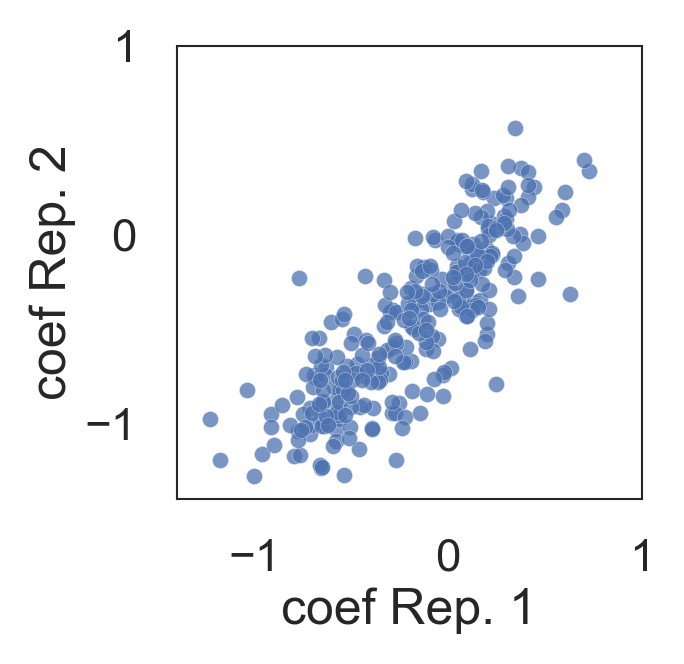

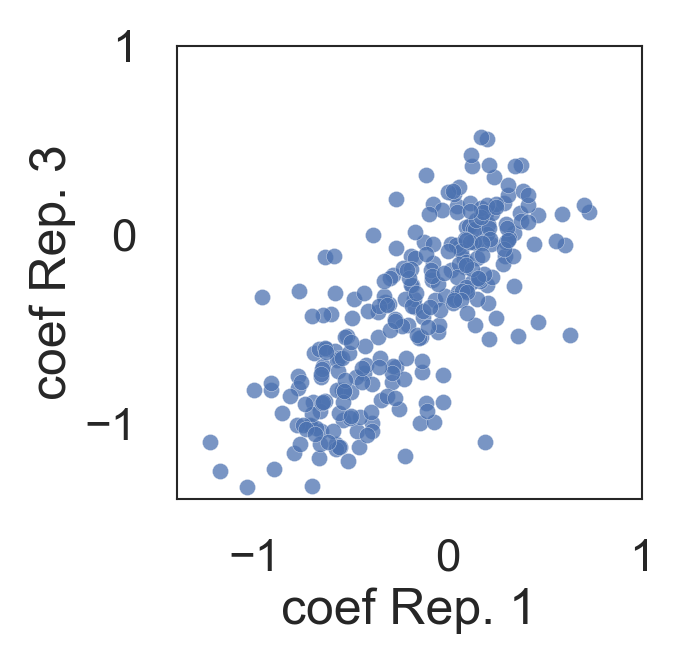

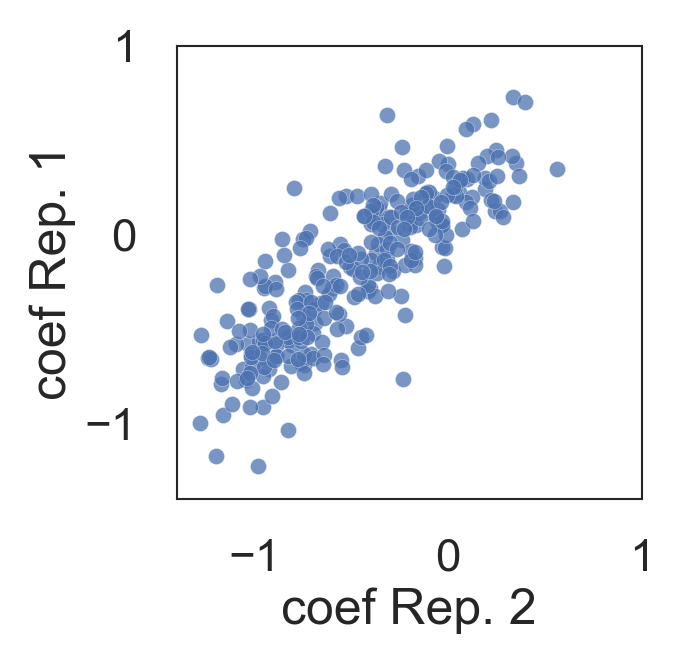

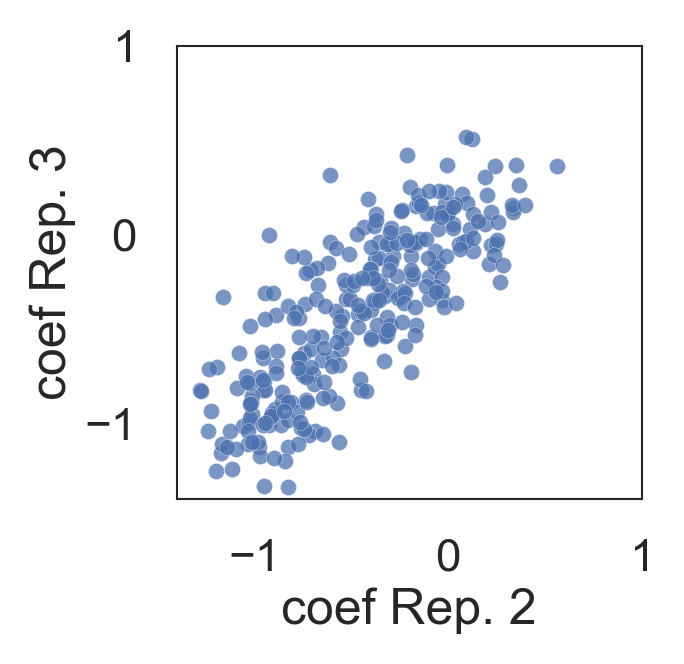

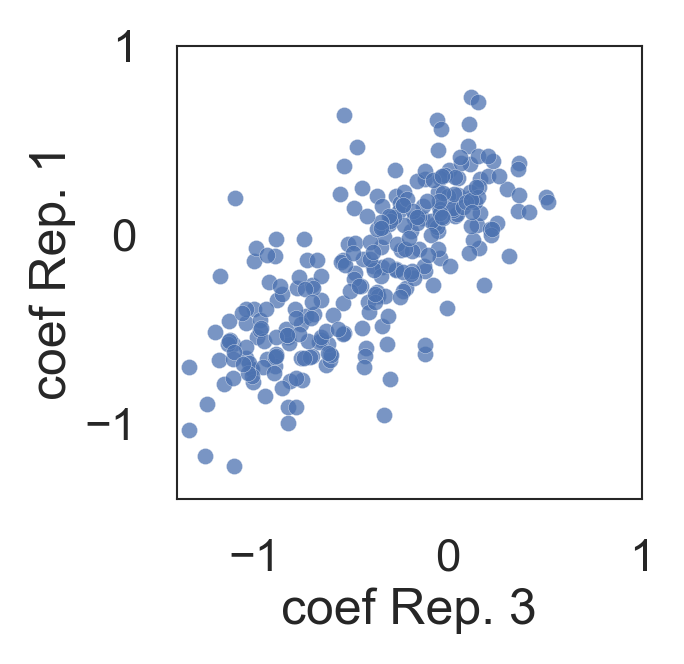

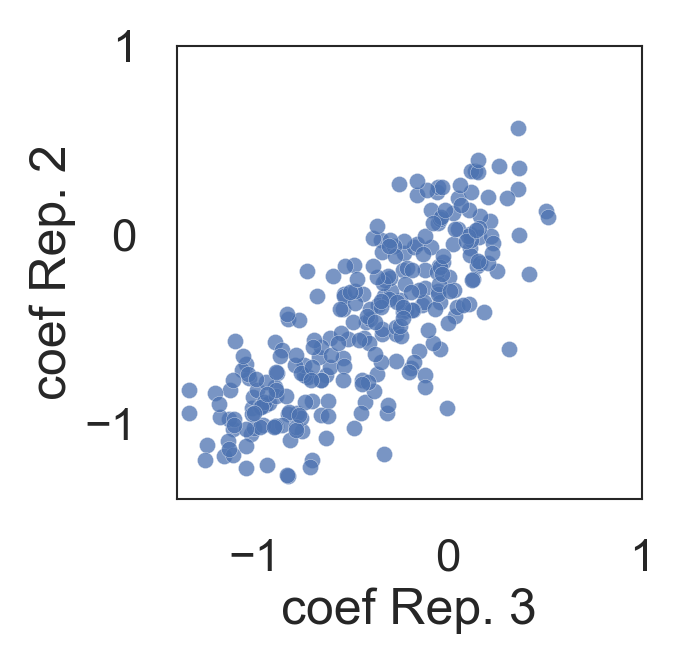

In [17]:
reps = [C7_1, C7_2, C7_3]

for i,repx in enumerate(reps,1):
    for j, repy in enumerate(reps,1): 
        if i != j:
            fig5 = plt.figure(figsize=(2,2), dpi = 300)

            ax = plt.gca()
            # ax.set_aspect('equal', 'box')
            # ax.plot([0,.008*100],[0,.008*100],c = 'grey', alpha = 1, linewidth = .25)
            ax.spines['top'].set_linewidth(0.5)
            ax.spines['right'].set_linewidth(0.5)
            ax.spines['bottom'].set_linewidth(0.5)
            ax.spines['left'].set_linewidth(0.5)
            ax.set_xlim(-1.4,1)
            ax.set_ylim(-1.4,1)

            
            sns.scatterplot(x = (repx.groupby('Aligned Position').mean()['coef']),
                            y = (repy.groupby('Aligned Position').mean()['coef']),
                            markers = 'o',
                            linewidth = .1,
#                             facecolor = ['none' if c == 'b' else 'black' for c in c_mean['shared_res_color']], 
                            alpha=.75, 
                            edgecolors='black',
                            s = 15
                           )
            plt.xlabel('coef Rep. %i' % i)
            plt.ylabel('coef Rep. %i' % j)
#             plt.savefig('c7_coef_scatter_%i_%i.svg' % (i,j), 
#                          transparent = True, 
#                          dpi = 300)
            plt.show()
            plt.close()

In [ ]:
# pickle.dump(C7_1, open('C7_1.pkl', 'wb'))
# pickle.dump(C7_2, open('C7_2.pkl', 'wb'))
# pickle.dump(C7_3, open('C7_3.pkl', 'wb'))

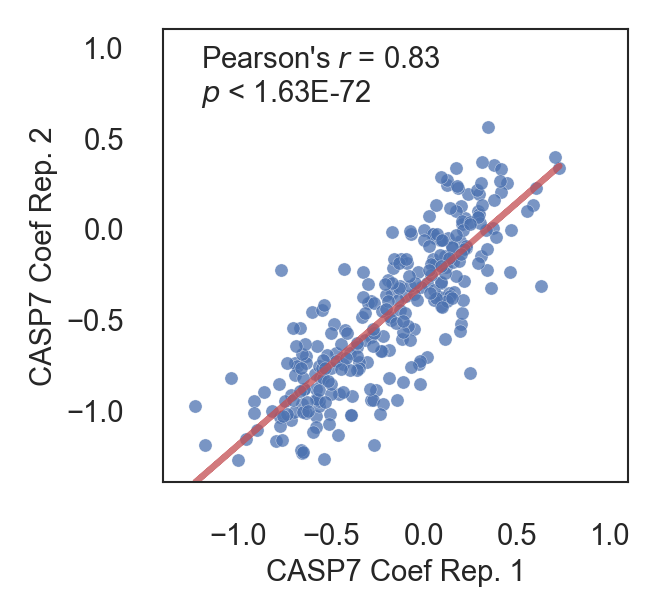

0.6892096801165591


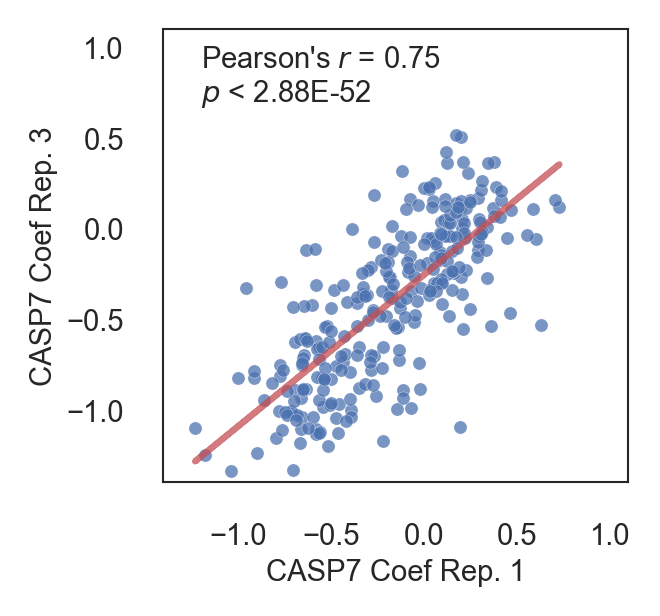

0.5656689236952388


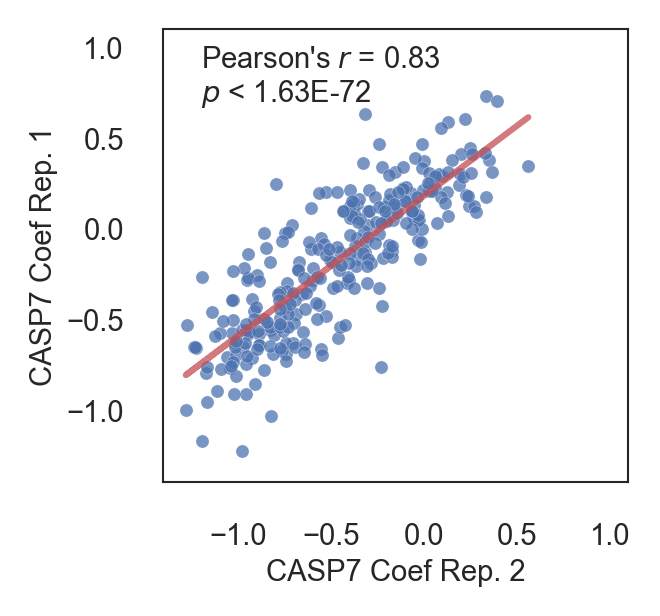

0.689209680116559


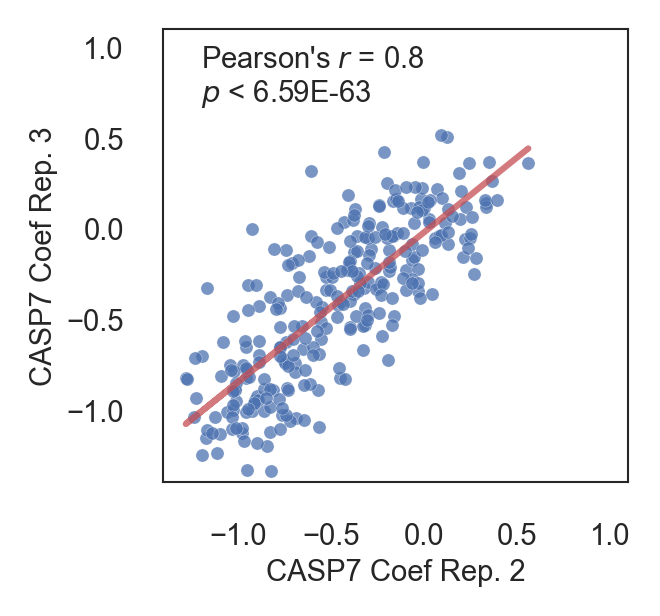

0.6357072756211172


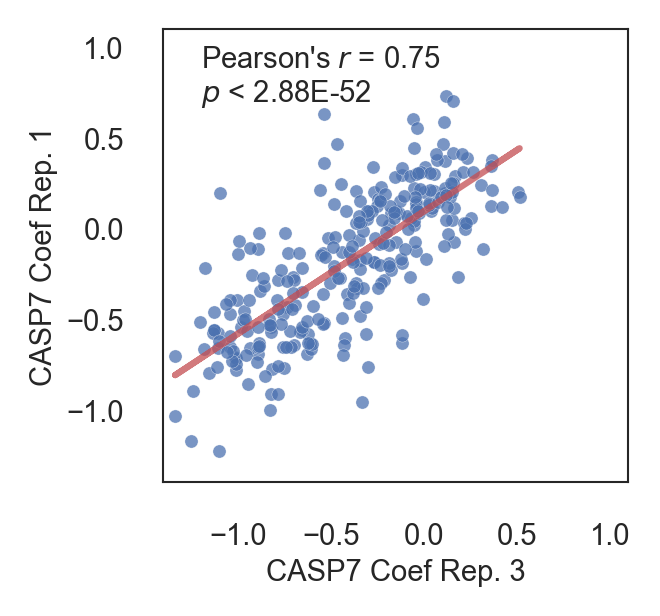

0.5656689236952388


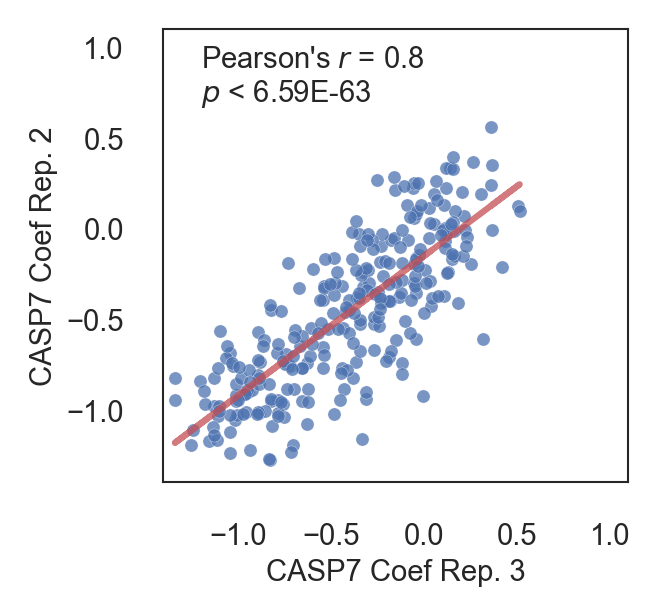

0.6357072756211173


In [20]:
reps = [C7_1, C7_2, C7_3]

for i,repx in enumerate(reps,1):
    for j, repy in enumerate(reps,1): 
        if i != j:
            fig5 = plt.figure(figsize=(2,2), dpi = 300)
            ax = plt.gca()
            # ax.set_aspect('equal', 'box')
            # ax.plot([0,.008*100],[0,.008*100],c = 'grey', alpha = 1, linewidth = .25)
            ax.spines['top'].set_linewidth(0.5)
            ax.spines['right'].set_linewidth(0.5)
            ax.spines['bottom'].set_linewidth(0.5)
            ax.spines['left'].set_linewidth(0.5)
            ax.set_xlim(-1.4,1.1)
            ax.set_ylim(-1.4,1.1)
            
            x = repx.groupby('Aligned Position').mean()['coef']
            y = repy.groupby('Aligned Position').mean()['coef']
            x1 = np.array(x)
            y1 = np.array(y)
            reg = LinearRegression().fit(x1[:, np.newaxis], y1[:, np.newaxis])
            r2 = reg.score(x1[:, np.newaxis], y1[:, np.newaxis])
            pearson_coef, p_value = stats.pearsonr(x1,y1)
            
            sns.scatterplot(x = x,
                            y = y,
                            markers = 'o',
                            linewidth = .1,
#                             facecolor = ['none' if c == 'b' else 'black' for c in c_mean['shared_res_color']], 
                            alpha=.75, 
                            edgecolors='black',
                            s = 10
                           )
            plt.plot(x1[:, np.newaxis], 
                     reg.predict(x1[:, np.newaxis]),
                     color='r',
                     alpha = 0.75,
                     )
            
            plt.xlabel('CASP7 Coef Rep. %i' % i, fontsize = 7)
            plt.ylabel('CASP7 Coef Rep. %i' % j, fontsize = 7)
            sr = """Pearson's $r$ = """ + str(round(pearson_coef, 2))
            sp = '$p$ < ' + str('%.2E' % Decimal(p_value))
            plt.text(-1.2, .7, 
                     sr + '\n' + sp ,
                     fontsize =7)
            plt.savefig('c7_coef_scatter_%i_%i.svg' % (i,j), 
                         transparent = True, 
                         dpi = 300)
            plt.show()
            print(r2)
            plt.close()